In [58]:
#importing related libraries
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline,FeatureUnion
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR, SVC
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [3]:
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union('https','com','href','td','tr','removed')   # adding to the list of stop words

In [4]:
df=pd.read_csv('./data/pc_subreddits.csv')

In [5]:
buildapc=df.iloc[:14999]

In [6]:
buildapc.dropna(inplace=True)  #There is enough data that we can safely drop NA/NAN values.

<ipython-input-6-5ee95600cdaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildapc.dropna(inplace=True)


In [7]:
buildapc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14505 entries, 0 to 14998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        14505 non-null  object
 1   created_utc  14505 non-null  int64 
 2   selftext     14505 non-null  object
 3   subreddit    14505 non-null  object
 4   author       14505 non-null  object
 5   media_only   14505 non-null  bool  
 6   permalink    14505 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 807.4+ KB


In [8]:
buildapcforme=pd.read_csv('./data/build_a_pc_for_me.csv')

In [9]:
buildapcforme.dropna(inplace=True)

In [10]:
buildapcforme.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14751 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        14751 non-null  object
 1   created_utc  14751 non-null  int64 
 2   selftext     14751 non-null  object
 3   subreddit    14751 non-null  object
 4   author       14751 non-null  object
 5   media_only   14751 non-null  bool  
 6   permalink    14751 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 821.1+ KB


### Comments from the two subreddits are put together to create df_combined.

In [11]:
df_combined=pd.concat([buildapc[['selftext','subreddit']],buildapcforme[['selftext','subreddit']]])

In [12]:
df_combined.reset_index(inplace=True)

In [13]:
df_combined.drop('index',axis=1,inplace=True)

In [14]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29256 entries, 0 to 29255
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   selftext   29256 non-null  object
 1   subreddit  29256 non-null  object
dtypes: object(2)
memory usage: 457.2+ KB


In [15]:
df_combined

,selftext,subreddit
0,Not sure if this is the correct sub or not but...,buildapc
1,"Hello,I need as much help as I can get because...",buildapc
2,I have my build but can't pick a motherboard. ...,buildapc
3,I'm getting my friends old RX580 after he upgr...,buildapc
4,[deleted],buildapc
...,...,...
29251,[removed],buildapcforme
29252,[removed],buildapcforme
29253,&gt;**What will you be doing with this PC? Be ...,buildapcforme
29254,&gt;&gt;**What will you be doing with this PC?...,buildapcforme


Let's save a csv with the data ready for modeling.

In [16]:
df_combined.to_csv('./data/combined_data.csv',index=0)

### Train_Test_Split: Splitting samples into training sets and testing sets. 

In [17]:
X=df_combined['selftext']
y=df_combined['subreddit']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

### Pipeline and GridSearchCV

In [19]:
vectorizer=TfidfVectorizer()
nbayes = MultinomialNB()
pipe=make_pipeline(vectorizer,nbayes)

In [20]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidfvectorizer', 'multinomialnb', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvectorizer__max_df', 'tfidfvectorizer__max_features', 'tfidfvectorizer__min_df', 'tfidfvectorizer__ngram_range', 'tfidfvectorizer__norm', 'tfidfvectorizer__preprocessor', 'tfidfvectorizer__smooth_idf', 'tfidfvectorizer__stop_words', 'tfidfvectorizer__strip_accents', 'tfidfvectorizer__sublinear_tf', 'tfidfvectorizer__token_pattern', 'tfidfvectorizer__tokenizer', 'tfidfvectorizer__use_idf', 'tfidfvectorizer__vocabulary', 'multinomialnb__alpha', 'multinomialnb__class_prior', 'multinomialnb__fit_prior'])

In [21]:
params={
    'tfidfvectorizer__stop_words':[stop_words],
    'tfidfvectorizer__max_features':[285],
    'tfidfvectorizer__ngram_range':[(1,3)],
    'multinomialnb__alpha':[100]
}

In [22]:
gs=GridSearchCV(pipe,params,n_jobs=-1)

### Training,Testing and Evaluating Multinomial Naive Bayes Model

In [23]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'multinomialnb__alpha': [100],
                         'tfidfvectorizer__max_features': [285],
                         'tfidfvectorizer__ngram_range': [(1, 3)],
                         'tfidfvectorizer__stop_words': [frozenset({'a',
                                                                    'about',
                                                                    'above',
                                                                    'across',
                                                                    'after',
                                                                    'afterwards',
                                                                    'again',
                                                                    'against',
            

In [24]:
gs.best_estimator_

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=285, ngram_range=(1, 3),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'a

In [25]:
gs.score(X_train,y_train)

0.9447634673229423

In [26]:
gs.score(X_test,y_test)

0.9528301886792453

In [27]:
#look at coefs
word_coefs=gs.best_estimator_.named_steps['multinomialnb'].coef_[0]
words=gs.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()

In [28]:
word_coef_df = pd.DataFrame({'coefs': word_coefs, 'word': words})
word_coef_df.sort_values('coefs',ascending=False)

,coefs,word
77,-3.663557,gt
147,-4.467903,need
231,-4.582987,specific
260,-4.693897,tower
13,-4.783323,budget
...,...,...
75,-6.584940,gb
6,-6.592512,atx
197,-6.647792,product
42,-6.690204,com product


### Charts and Other Classification Metrics

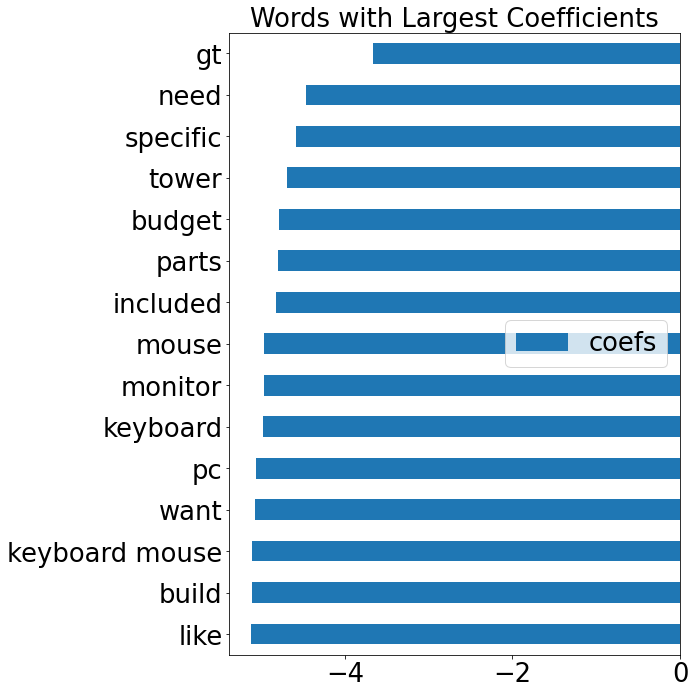

In [41]:
#examine a plot of 15 largest
top_15=word_coef_df.nlargest(15,'coefs').plot(kind='barh')
plt.yticks(list(range(15)),word_coef_df.nlargest(15,'coefs')['word'])
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.title('Words with Largest Coefficients')
plt.tight_layout()
plt.rcParams.update(params)
plt.gca().invert_yaxis()
plt.savefig('./images/words_with_largest_coefs.png')

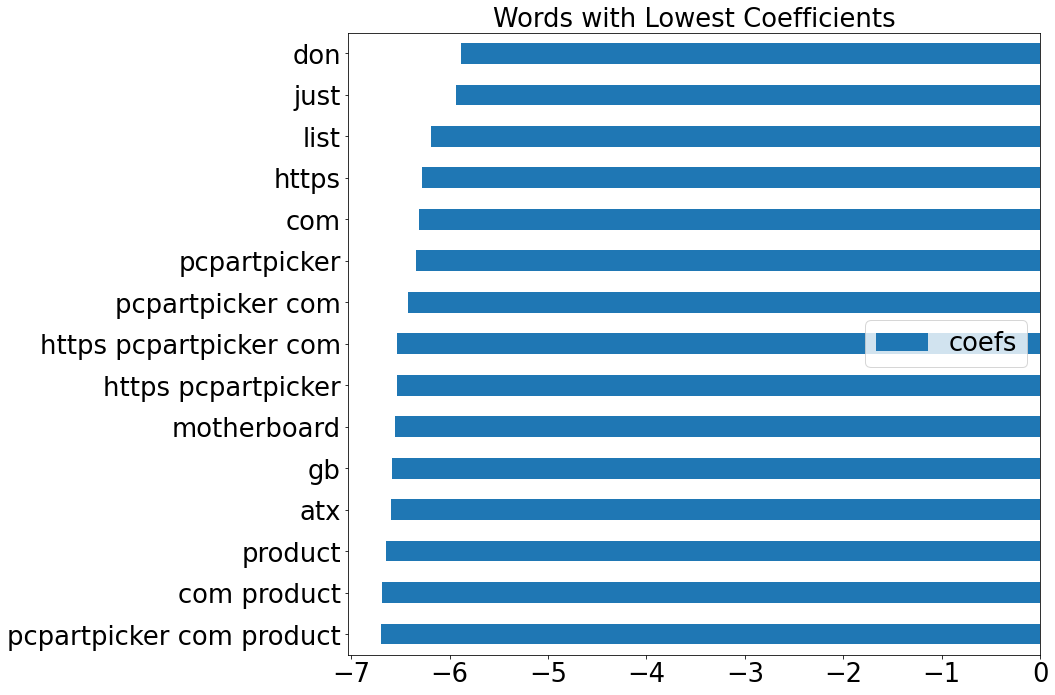

In [55]:
#examine a plot of features with the lowest 15 values
word_coef_df.nsmallest(15,'coefs').plot(kind='barh')
plt.yticks(list(range(15)),word_coef_df.nsmallest(15,'coefs')['word'])
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.title('Words with Lowest Coefficients')
plt.tight_layout()
plt.rcParams.update(params)
plt.savefig('./images/words_with_smallest_coefs.png')

In [43]:
word_coef_df.to_csv('./data/words_with_coeffs.csv', index=0)

In [44]:
np.array(y_test)

array(['buildapcforme', 'buildapc', 'buildapc', ..., 'buildapc',
       'buildapc', 'buildapcforme'], dtype=object)

In [45]:
#f1 score
y_preds=gs.predict(X_test)
print('f1 score for model is:',f1_score(np.array(y_test),y_preds,pos_label='buildapcforme'))

f1 score for model is: 0.9539570265581209


In [46]:
print(classification_report(np.array(y_test),y_preds))

               precision    recall  f1-score   support

     buildapc       0.97      0.94      0.95      3624
buildapcforme       0.94      0.97      0.95      3690

     accuracy                           0.95      7314
    macro avg       0.95      0.95      0.95      7314
 weighted avg       0.95      0.95      0.95      7314



In [47]:
gs.predict_proba(X_test)

array([[4.95898277e-01, 5.04101723e-01],
       [6.29920834e-01, 3.70079166e-01],
       [8.73579852e-01, 1.26420148e-01],
       ...,
       [9.99084459e-01, 9.15540965e-04],
       [9.81541449e-01, 1.84585508e-02],
       [4.95898277e-01, 5.04101723e-01]])

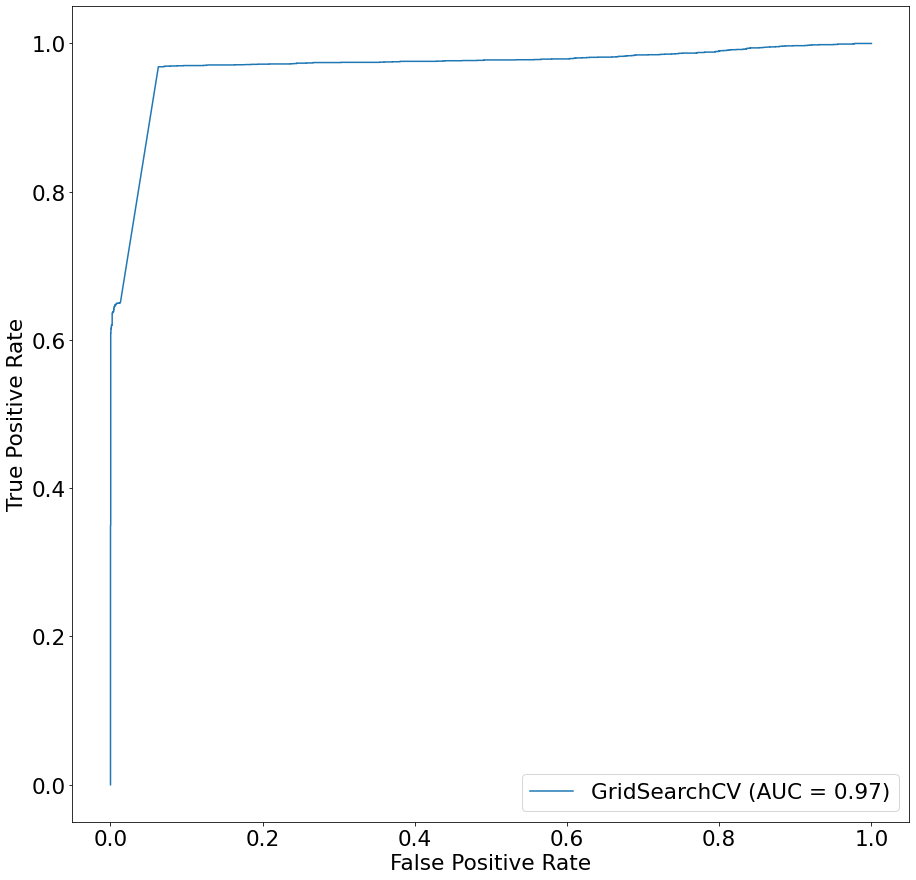

In [52]:
plot_roc_curve(gs,X_test,y_test)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.savefig('./images/NB_ROC_curve.png')

In [49]:
predictions_vs_actual=pd.DataFrame({'Actual':y_test,'Predicted':y_preds})

In [50]:
predictions_vs_actual.to_csv('./data/predictions_vs_actual.csv')

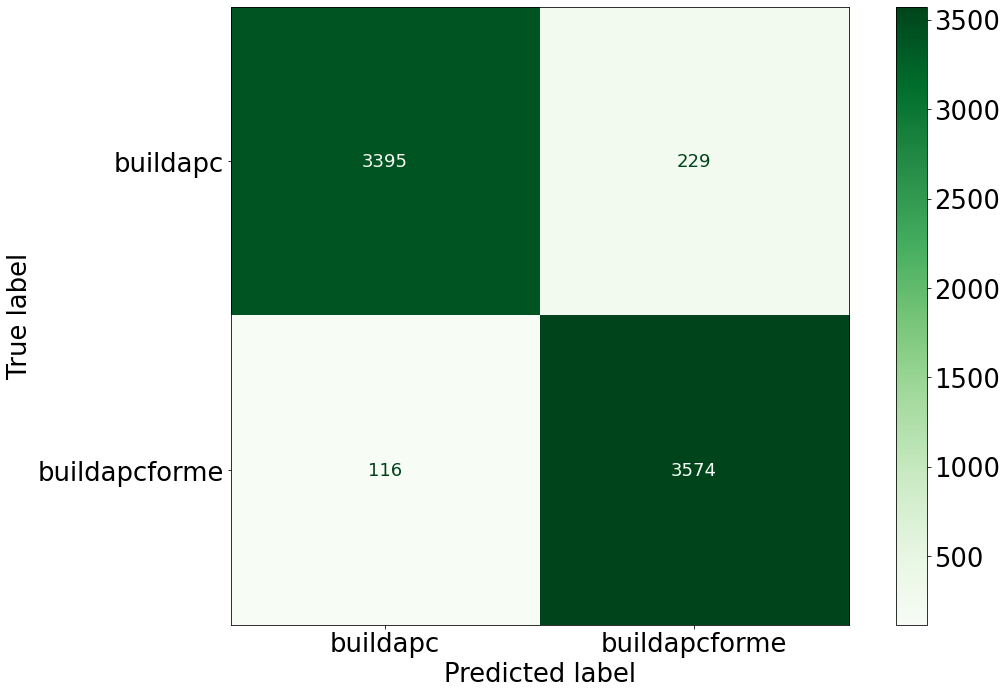

In [57]:
#fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 18})
plot_confusion_matrix(gs,X_test,y_test,cmap='Greens')
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)
plt.tight_layout()
plt.savefig('./images/NB_Confusion_matrix.png')